Our eyes do not perceive light the way cameras do. With a digital camera, when twice the number of photons hit the sensor, it receives twice the signal (a "linear" relationship). That's not how our eyes work. Instead, we perceive twice the light as being only a fraction brighter, and increasingly so for higher light intensities. Compared to a camera, we are much more sensitive to changes in dark tones than we are to similar changes in bright tones. So, how does all this relate to gamma? Gamma is what translates between our eye's light sensitivity and that of the camera. Gamma correction can be used to correct the brightness of an image by using a non-linear transformation between the input values and the mapped output values.

$$ O = (\frac{I}{255})^\gamma \times 255 $$

where $O$ is the output pixel values and $I$ is the input pixel values.
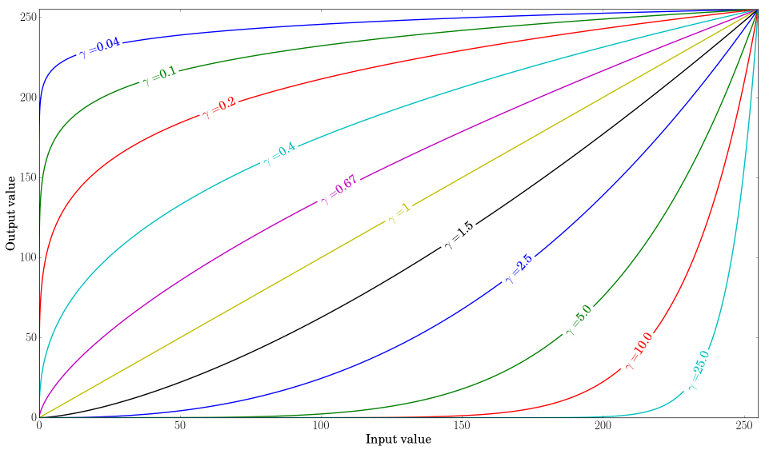

Based on the above figure, it is evident that when $\gamma$ is less than 1, the lower input intensity values will be mapped to higher intensity and vice versa when $\gamma$ is more than 1. If $\gamma$ is 1, then gamma correction will be equivalent to linear mapping.

(<Axes: title={'center': 'gamma correction'}>, None)

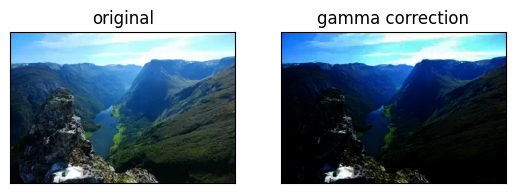

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_inline_img(arr: np.ndarray, title=None, xyticks=False, grayscale=True):
    if grayscale:
        plt.imshow(arr, cmap = plt.cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(arr)
    plt.title(title)
    if not xyticks:
        plt.xticks([]), plt.yticks([])

def create_LUT(gamma):
    look_up_table = [np.clip(((i / 255) ** gamma) * 255, 0, 255) 
                    for i in range(256)]
    return np.uint8(look_up_table).reshape(1, 256)
    
img = cv.imread("images/scene.webp")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gamma = 2.2
look_up_table = create_LUT(gamma)
res = cv.LUT(img, look_up_table)

plt.subplot(121), display_inline_img(img, title="original", grayscale=False)
plt.subplot(122), display_inline_img(res, title="gamma correction", grayscale=False)